# Theromdynamics Cycle

**Rio Agustian Gilang Fernando**

**Advanced Material Science and Nanotechnology**

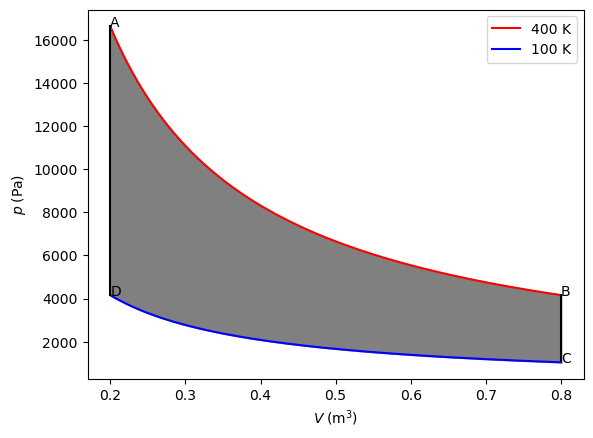

In [46]:
import numpy as np
from scipy.constants import R
import matplotlib.pyplot as plt

def get_p(V, T):
    """
    Return the pressure of 1 mol of an ideal gas at (V, T).
    """
    return R *  T / V

def stirling_cycle(V1, T_cold, V2, T_hot):
    """
    Plot a p_V ddiagram for a Striling cycle defined by V1, T_cold, V2,  T_hot.
    """

    # Define variables for the state of the gas at each stage of the cycle
    VA, TA, pA = V1, T_hot,  get_p(V1, T_hot)
    VB, TB, pB = V2, T_hot,  get_p(V2, T_hot)
    VC, TC, pC = V2, T_cold, get_p(V2, T_cold)
    VD, TD, pD = V1, T_cold, get_p(V1, T_cold)

    # A -> B: isothermal expansion at T-hot.
    V_hot = np.linspace(VA, VB, 1000)
    p_hot = get_p(V_hot, T_hot)

    plt.plot(V_hot, p_hot, c='r', label='{} K'.format(T_hot))

    # B -> C: isochoric cooling from T_hot to T_cold
    plt.plot([VB, VC], [pB, pC], c='k')

    # C -> D: isothermal compression at T_cold
    V_cold = np.linspace(VC, VD, 1000)
    p_cold = get_p(V_cold, T_cold)
    plt.plot(V_cold, p_cold, c='b', label='{} K'.format(T_cold))

    # D -> A: isochoric heating from T_cold to T_hot
    plt.plot([VD, VA], [pD, pA], c='k')

    # Fill the region between the iostherm curves.
    plt.fill_between(V_cold[::-1], p_cold[::-1], p_hot, color='gray')

    # Label the four states A, B, C, and D
    plt.text(VA, pA, 'A')
    plt.text(VB, pB, 'B')
    plt.text(VC, pC, 'C')
    plt.text(VD, pD, 'D')

    plt.xlabel(r'$V \; (\mathrm{m^3})$')
    plt.ylabel(r'$p \; (\mathrm{Pa})$')
    plt.legend()

V1, T_cold = 0.2, 100
V2, T_hot = 0.8, 400
stirling_cycle(V1, T_cold, V2, T_hot)